In [154]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import binarize

In [94]:
#Input file
INPUT_FILE = 'churn.csv'
dataframe = pd.read_csv(INPUT_FILE, header = 0)

In [95]:
dataframe

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [96]:
#Convert churn to int
dataframe["Churn"] = dataframe["Churn"].astype(int)

In [97]:
#Take a look at the count
dataframe.groupby("Churn").Churn.count() 

Churn
0    2278
1     388
Name: Churn, dtype: int64

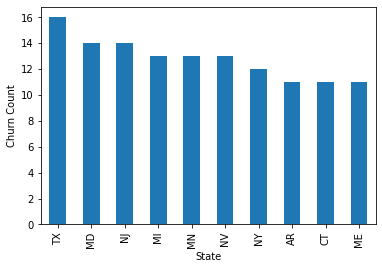

In [98]:
#Plot States churn count
trueChurns =  dataframe.loc[dataframe["Churn"] == 1]
trueChurns.groupby(['State']).State.count().nlargest(10).plot(kind="bar")
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.show()

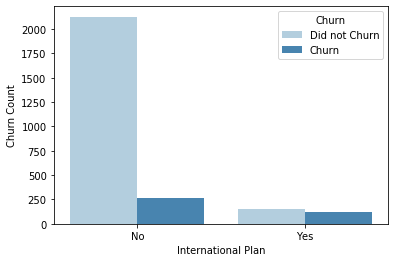

In [101]:
#Plot International Plan churn count
sns.countplot(x = 'International plan', hue = 'Churn', data = dataframe, palette = 'Blues' )
plt.xlabel('International Plan')
plt.ylabel('Churn Count')
plt.legend(title='Churn', loc="upper right", labels=['Did not Churn','Churn'])
plt.show()

In [102]:
#Drop State column
dataframe.drop(['State'], axis=1, inplace=True)

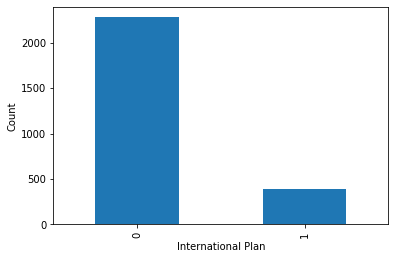

In [103]:
#Check if the dataset is imbalanced
dataframe.groupby('Churn').Churn.count().plot(kind="bar")
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

In [104]:
#Use one hot encoding to convert string into int
toOneHotEncode = ['International plan','Voice mail plan']
oneHotEncoded = pd.get_dummies(dataframe, columns = toOneHotEncode)
newDataFrame = oneHotEncoded
churnCol = newDataFrame['Churn']
newDataFrame = newDataFrame.drop(['Churn'], axis = 1)
newDataFrame['TargetCol'] = churnCol

In [105]:
newDataFrame

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,TargetCol
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,1,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,1,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,1,0,1,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,1,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,9.96,11.8,5,3.19,2,1,0,1,0,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,1,0,0,1,0
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,1,0,1,0,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,1,0,1,0,0


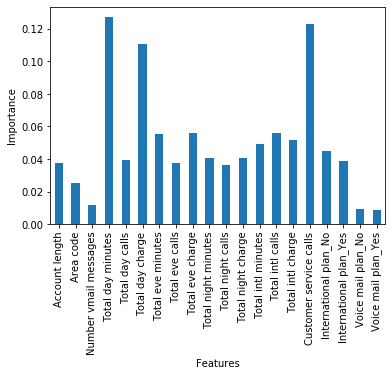

In [106]:
#Get all the columns except target column
X = newDataFrame.iloc[:,0:20]
#Get the target column
y = newDataFrame.iloc[:,-1]
#Checkout which feature has the highest importance
model = ExtraTreesClassifier(random_state=0)
model.fit(X,y)
featureImportance = pd.Series(model.feature_importances_, index = X.columns)
featureImportance.plot(kind="bar")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


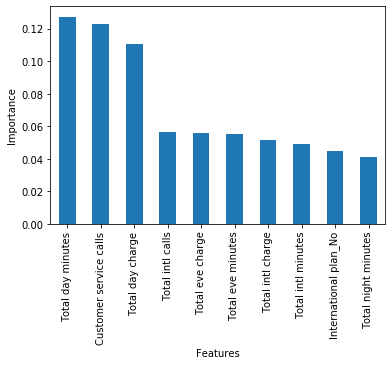

In [107]:
#Get top 10 highest features
featureImportance = pd.Series(model.feature_importances_, index = X.columns)
featureImportance.nlargest(10).plot(kind="bar")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

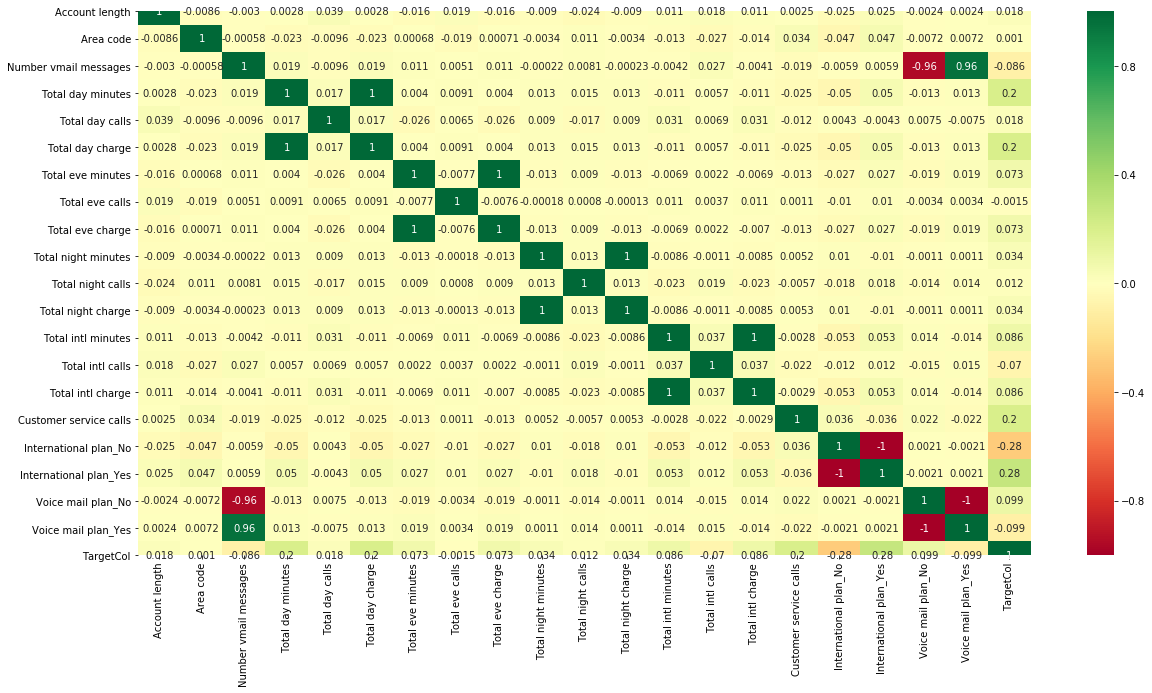

In [108]:
#Correlations between features
CorrelationFeatures = newDataFrame.corr().index
plt.figure(figsize=(20,10))
sns.heatmap(newDataFrame[CorrelationFeatures].corr(), annot = True, cmap="RdYlGn")

In [109]:
#Prepare final dataset
featureColumns = ['Total day minutes', 'Customer service calls', 'Total day charge', 'Total intl calls',
                              'Total eve charge', 'Total eve minutes', 'Total intl charge', 'Total intl minutes',
                  'International plan_No', 'Total night minutes', 'TargetCol']
finalDataFrame = newDataFrame[featureColumns]
finalDataFrame

,Total day minutes,Customer service calls,Total day charge,Total intl calls,Total eve charge,Total eve minutes,Total intl charge,Total intl minutes,International plan_No,Total night minutes,TargetCol
0,265.1,1,45.07,3,16.78,197.4,2.70,10.0,1,244.7,0
1,161.6,1,27.47,3,16.62,195.5,3.70,13.7,1,254.4,0
2,243.4,0,41.38,5,10.30,121.2,3.29,12.2,1,162.6,0
3,299.4,2,50.90,7,5.26,61.9,1.78,6.6,0,196.9,0
4,166.7,3,28.34,3,12.61,148.3,2.73,10.1,0,186.9,0
...,...,...,...,...,...,...,...,...,...,...,...
2661,134.7,2,22.90,5,16.12,189.7,3.19,11.8,1,221.4,0
2662,156.2,2,26.55,6,18.32,215.5,2.67,9.9,1,279.1,0
2663,231.1,3,39.29,4,13.04,153.4,2.59,9.6,1,191.3,0
2664,180.8,2,30.74,6,24.55,288.8,3.81,14.1,1,191.9,0


In [235]:
#linear project for orange
finalDataFrame.to_excel("finalDataFrame.xlsx", index = False);

In [110]:
#Get all the features
newX = finalDataFrame.iloc[:,0:10]
#Get the target column
newy = finalDataFrame.iloc[:,-1]
#Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size = 0.30,random_state = 1)

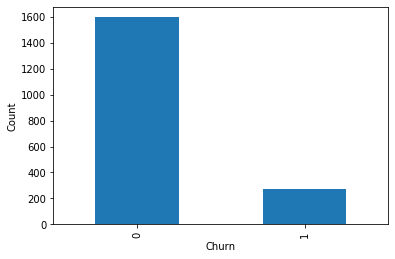

In [111]:
#Concat both X_train and y_train
trainingDataset = pd.concat([X_train,  y_train], axis=1)
trainingDataset.groupby('TargetCol').TargetCol.count().plot(kind="bar")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [112]:
#Since we can see our dataset is highly unbalanced. We will use SMOTE to balance our training dataset
smote = SMOTE()
xTrainSmote, yTrainSmote = smote.fit_sample(X_train, y_train)

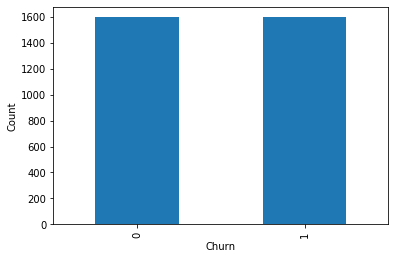

In [113]:
#Balance the dataset using SMOTE
smoteOutput = pd.concat([xTrainSmote,  yTrainSmote], axis=1)
smoteOutput.groupby('TargetCol').TargetCol.count().plot(kind="bar")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [236]:
X_test

,Total day minutes,Customer service calls,Total day charge,Total intl calls,Total eve charge,Total eve minutes,Total intl charge,Total intl minutes,International plan_No,Total night minutes
1505,207.2,1,35.22,1,21.76,256.0,2.67,9.9,1,211.0
275,213.0,1,36.21,1,15.01,176.6,2.46,9.1,1,262.6
620,214.9,2,36.53,2,10.01,117.8,3.19,11.8,1,133.7
1825,145.7,0,24.77,7,16.24,191.0,3.05,11.3,1,215.5
1958,117.6,1,19.99,3,16.69,196.3,1.73,6.4,1,157.4
...,...,...,...,...,...,...,...,...,...,...
804,232.5,0,39.53,2,17.47,205.5,3.21,11.9,1,213.7
181,223.0,0,37.91,12,9.36,110.1,1.92,7.1,1,188.7
406,143.1,2,24.33,5,20.11,236.6,3.08,11.4,1,227.8
414,93.6,1,15.91,5,16.47,193.8,4.73,17.5,1,144.9


In [237]:
xTrainSmote

,Total day minutes,Customer service calls,Total day charge,Total intl calls,Total eve charge,Total eve minutes,Total intl charge,Total intl minutes,International plan_No,Total night minutes
0,251.900000,2,42.820000,3,16.540000,194.600000,2.270000,8.400000,1,211.200000
1,195.900000,3,33.300000,4,19.430000,228.600000,3.290000,12.200000,1,303.500000
2,95.000000,2,16.150000,2,24.750000,291.200000,2.700000,10.000000,1,159.600000
3,275.800000,2,46.890000,5,16.110000,189.500000,2.000000,7.400000,1,223.900000
4,133.400000,1,22.680000,7,17.390000,204.600000,3.000000,11.100000,1,196.900000
...,...,...,...,...,...,...,...,...,...,...
3185,235.790845,3,40.087234,2,21.393720,251.723239,2.062817,7.653585,0,284.804417
3186,194.626977,1,33.087810,3,17.670522,207.926381,2.406542,8.914753,0,201.703575
3187,182.660541,0,31.055078,3,18.288006,215.173173,4.312024,15.980777,0,214.675327
3188,173.230498,2,29.450477,4,12.561701,147.762904,2.017478,7.472141,0,214.254106


In [124]:
#Use Logistic Regression at the first method
logreg = LogisticRegression(solver="liblinear")
logreg.fit(xTrainSmote, yTrainSmote)
yPredClass = logreg.predict(X_test)

In [196]:
#Create a report
print(classification_report(y_test, yPredClass))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       683
           1       0.34      0.63      0.44       117

    accuracy                           0.77       800
   macro avg       0.63      0.71      0.65       800
weighted avg       0.84      0.77      0.79       800



In [130]:
#Print Confusion matrix
metrics.confusion_matrix(y_test, yPredClass)

array([[539, 144],
       [ 43,  74]], dtype=int64)

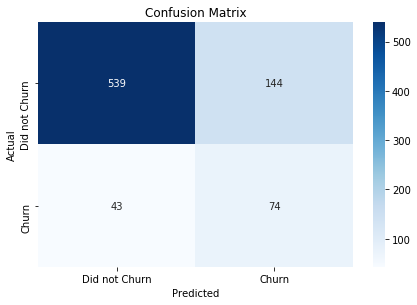

In [129]:
#Confusion Matrix - 
# print(metrics.confusion_matrix(y_test, yPredClass))
cm = metrics.confusion_matrix(y_test, yPredClass)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
plt.tight_layout()
ax.set_ylim([2,0])
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Did not Churn', 'Churn']); 
ax.yaxis.set_ticklabels(['Did not Churn', 'Churn']);

In [217]:
#Get all the values for different  metrics
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
NF = cm[1,0]
print("TP: ", cm[1,1])
print("TN: ", cm[0,0])
print("FP: ", cm[0,1])
print("FN: ", cm[1,0])

TP:  74
TN:  539
FP:  144
FN:  43


In [218]:
#Calculate accuracy
accuracy_score(y_test, yPredClass)

0.76625

In [219]:
#Classification Error
1 - accuracy_score(y_test, yPredClass)

0.23375

In [220]:
#Sensitivity
metrics.recall_score(y_test, yPredClass)

0.6324786324786325

In [221]:
#Specificity
print(TN/float(TN + FP))

0.7891654465592972


In [222]:
#False Positive rate
print(FP/float(TN + FP))

0.2108345534407028


In [144]:
#Precision
metrics.precision_score(y_test, yPredClass)

0.3394495412844037

In [145]:
#FN is more important because from the business stand point we do not want to flag customer as not churn, but in fact they churn
#Therefore, in this case sensitivity is more important and we should try to minimize FN

In [146]:
#Use Predict proba to get probability
yPredProb = logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Count')

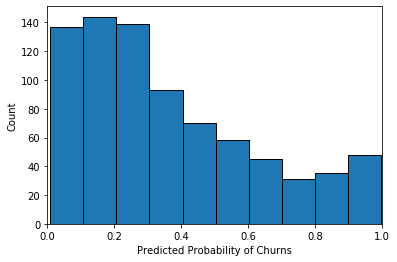

In [238]:
#Predicted probability #Lower the threshold to increase the sensitivity
plt.hist(yPredProb, bins=10, ec='black')
plt.xlim(0,1)
plt.xlabel('Predicted Probability of Churns')
plt.ylabel('Count')

In [151]:
#Old Confusion Matrix
cm

array([[539, 144],
       [ 43,  74]], dtype=int64)

In [171]:
#New predicted classes
newYPredClass = binarize(yPredProb, 0.3)

C:\Users\Deep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [172]:
#Checkout the confusion matrix with threshold of 0.3
metrics.confusion_matrix(y_test, newYPredClass)

array([[401, 282],
       [ 13, 104]], dtype=int64)

In [174]:
#Sensitivity. Therefore, we can see that model have more sensitivity and low FN 
metrics.recall_score(y_test, newYPredClass)

0.8888888888888888

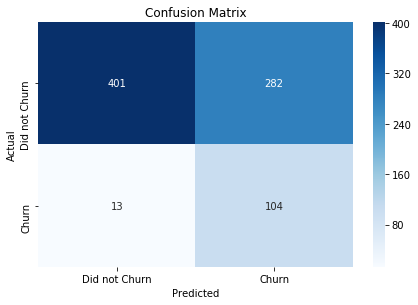

In [181]:
#Confusion Matrix - 
newCM = metrics.confusion_matrix(y_test, newYPredClass)
ax= plt.subplot()
sns.heatmap(newCM, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
plt.tight_layout()
ax.set_ylim([2,0])
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Did not Churn', 'Churn']); 
ax.yaxis.set_ticklabels(['Did not Churn', 'Churn']);

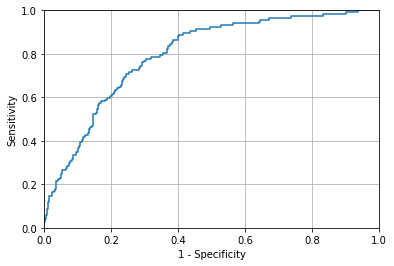

In [239]:
#ROC curve can help us pick a treshold that would make sense for our business
yPredProb = yPredProb.reshape(yPredProb.shape[0],1)
fpr, tpr, thresholds = metrics.roc_curve(y_test, yPredProb)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.grid(True)

In [240]:
#Confusion matrix
newCM

array([[401, 282],
       [ 13, 104]], dtype=int64)

In [249]:
#create variables for different metrics
LG_NEW_TP = newCM[1,1]
LG_NEW_TN = newCM[0,0]
LG_NEW_FP = newCM[0,1]
LG_NEW_FN = newCM[1,0]
print("TP: ", newCM[1,1])
print("TN: ", newCM[0,0])
print("FP: ", newCM[0,1])
print("FN: ", newCM[1,0])

TP:  104
TN:  401
FP:  282
FN:  13


In [250]:
#Calculate accuracy
print((LG_NEW_TP + LG_NEW_TN)/float(LG_NEW_TP + LG_NEW_TN + LG_NEW_FP + LG_NEW_FN))

0.63125


In [251]:
#Classification Error
print(1 - (LG_NEW_TP + LG_NEW_TN)/float(LG_NEW_TP + LG_NEW_TN + LG_NEW_FP + LG_NEW_FN))

0.36875


In [252]:
#Sensitivity
print((LG_NEW_TP)/float(LG_NEW_TP + LG_NEW_FN))

0.8888888888888888


In [253]:
#Specificity
print((LG_NEW_TN)/float(LG_NEW_TN + LG_NEW_FP))

0.5871156661786238


In [254]:
#Precision
print((LG_NEW_TP)/float(LG_NEW_TP + LG_NEW_FP))

0.2694300518134715


In [184]:
#AUC Score
metrics.roc_auc_score(y_test, yPredProb)

0.7964485490107744

In [211]:
#Support Vector Machine
X_train, X_test, y_train, y_test
s = StandardScaler()
xTrainScaler = s.fit_transform(xTrainSmote)
xTestScaler = s.transform(X_test)
clf = svm.SVC(probability=True, kernel="rbf")
clf.fit(xTrainScaler, yTrainSmote)
svmPred = clf.predict(xTestScaler)

In [212]:
#Print a summary report
print(classification_report(y_test, svmPred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       683
           1       0.55      0.78      0.64       117

    accuracy                           0.87       800
   macro avg       0.75      0.83      0.78       800
weighted avg       0.90      0.87      0.88       800



In [213]:
#Get the confusion matrix for SVM
confusion_matrix(y_test, svmPred)

array([[608,  75],
       [ 26,  91]], dtype=int64)

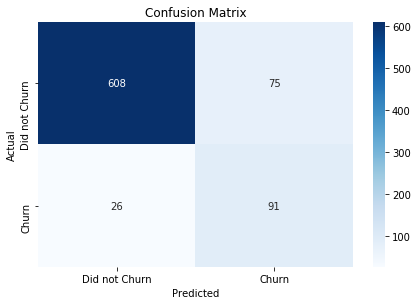

In [215]:
#Confusion Matrix - 
svmCM = metrics.confusion_matrix(y_test, svmPred)
ax= plt.subplot()
sns.heatmap(svmCM, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
plt.tight_layout()
ax.set_ylim([2,0])
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Did not Churn', 'Churn']); 
ax.yaxis.set_ticklabels(['Did not Churn', 'Churn']);

In [223]:
#Create variables for computing different metrics
SVM_TP = svmCM[1,1]
SVM_TN = svmCM[0,0]
SVM_FP = svmCM[0,1]
SVM_NF = svmCM[1,0]
print("TP: ", svmCM[1,1])
print("TN: ", svmCM[0,0])
print("FP: ", svmCM[0,1])
print("FN: ", svmCM[1,0])

TP:  91
TN:  608
FP:  75
FN:  26


In [225]:
#Calculate accuracy
accuracy_score(y_test, svmPred)

0.87375

In [226]:
#Classification Error
1 - accuracy_score(y_test, svmPred)

0.12624999999999997

In [228]:
#Sensitivity
metrics.recall_score(y_test, svmPred)

0.7777777777777778

In [229]:
#Specificity
print(SVM_TN/float(SVM_TN + SVM_FP))

0.890190336749634


In [230]:
#False Positive rate
print(SVM_FP/float(SVM_TN + SVM_FP))

0.10980966325036604


In [231]:
#Precision
metrics.precision_score(y_test, svmPred)

0.5481927710843374

In [255]:
dataframe

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [259]:
#This is used to create metrics comparison plot in excel
metricsData = [[0.87375, 0.12624, 0.77777, 0.89019, 0.54819, 0.64, 'S'], 
[0.63125, 0.36875, 0.88888, 0.58711, 0.26943, 2*((0.26943*0.88888)/(0.26943+0.88888)), 'L']]
compareMetricsDF = pd.DataFrame(metricsData, columns = ['Accuracy', 'Classification Error', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1-score', 'Model']) 

In [264]:
compareMetricsDF

,Accuracy,Classification Error,Sensitivity/Recall,Specificity,Precision,F1-score,Model
0,0.87375,0.12624,0.77777,0.89019,0.54819,0.640000,S
1,0.63125,0.36875,0.88888,0.58711,0.26943,0.413518,L


In [265]:
#Output in an excel document
compareMetricsDF.to_excel("compareMetrics.xlsx", index = False);